# 11-Python Packages That Turn Hundreds of Lines of Code into One

## 1. Pandas

In [41]:
# !pip install pandas

the data into a DataFrame, performing the group-by operation, and printing the result.<br>
дані в DataFrame, виконуючи операцію групування та друкуючи результат.

In [42]:
import pandas as pd

# Step 1: Read the CSV file into a DataFrame
df = pd.read_csv('sales_data.csv')

# Step 2: Group by 'category' and calculate the mean sales for each category
mean_sales = df.groupby('category')['sales'].mean()

# Step 3: Print the result
print(mean_sales)

category
Clothing       125.0
Electronics    300.0
Furniture      200.0
Name: sales, dtype: float64


In [43]:
import pandas as pd

# Condensed one-liner
df = pd.read_csv('sales_data.csv').groupby('category')['sales'].mean()
# print(df)
df

category
Clothing       125.0
Electronics    300.0
Furniture      200.0
Name: sales, dtype: float64

## 2. Numpy

In this demonstration, we’ll multiply two matrices using the np.dot() function in just one line. Let's say you have two matrices:<br>
У цій демонстрації ми помножимо дві матриці за допомогою функції np.dot() лише в одному рядку. Припустимо, у вас є дві матриці:

In [44]:
# Define the matrices
matrix1 = [[1, 2], [3, 4]]

matrix2 = [[5, 6], [7, 8]]

#### Before (Without NumPy):

In [45]:
# Perform matrix multiplication manually
result = [[0, 0], [0, 0]]

for i in range(len(matrix1)):
    for j in range(len(matrix2[0])):
        for k in range(len(matrix2)):
            result[i][j] += matrix1[i][k] * matrix2[k][j]

# Print the result
print("Result (Without Numpy):")
for r in result:
    print(r)

Result (Without Numpy):
[19, 22]
[43, 50]


#### After (With NumPy):

In [46]:
import numpy as np
# Step 1: Define the matrices using Numpy arrays
matrix1_ = np.array(matrix1)

matrix2_ = np.array(matrix2)

# Step 2: Perform matrix multiplication using np.dot()
result_ = np.dot(matrix1_, matrix2_)

# Step 3: Print the result
print("Result (With Numpy):\n", result_)

Result (With Numpy):
 [[19 22]
 [43 50]]


## 3. SQLAlchemy

#### Before SQLAlchemy (Using Raw SQL):
You’d need to manually write SQL statements for every action:<br>
Вам потрібно буде вручну написати оператори SQL для кожної дії:

In [57]:
# -- Step 1: Create the users table
CREATE TABLE users (
  id INTEGER PRIMARY KEY AUTOINCREMENT,
  username TEXT,
  active BOOLEAN
);

# -- Step 2: Insert multiple users
INSERT INTO users (username, active) VALUES ('Alice', 1);
INSERT INTO users (username, active) VALUES ('Bob', 0);
INSERT INTO users (username, active) VALUES ('Charlie', 1);

# -- Step 3: Query active users
SELECT * FROM users WHERE active = 1;

SyntaxError: invalid syntax (525694452.py, line 2)

#### After SQLAlchemy (Using Python ORM):
Після SQLAlchemy (з використанням Python ORM):
With SQLAlchemy, you define your data model once and interact with it using Python objects. Here’s the equivalent code:<br>
За допомогою SQLAlchemy ви один раз визначаєте свою модель даних і взаємодієте з нею за допомогою об’єктів Python. Ось еквівалентний код:

In [49]:
!pip install sqlalchemy

In [56]:
from sqlalchemy import create_engine, Column, Integer, String, Boolean
# from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.orm import sessionmaker, declarative_base

# Step 1: Define the table using SQLAlchemy models
Base = declarative_base()

class User(Base):
    __tablename__ = 'users'
    id = Column(Integer, primary_key=True)
    username = Column(String)
    active = Column(Boolean)

# Step 2: Set up the database engine and session
engine = create_engine('sqlite:///example_2.db')
Session = sessionmaker(bind=engine)
session = Session()

# Create the table
Base.metadata.create_all(engine)

# Step 3: Insert multiple users
new_users = [User(username='Alice', active=True),
             User(username='Bob', active=True),
             User(username='Charlie', active=False)]

session.add_all(new_users)
session.commit()

# Step 4: Query active users
active_users = session.query(User).filter_by(active=True).all()

# Print the active users
for user in active_users:
    print(f"User ID: {user.id}, Username: {user.username}")

User ID: 1, Username: Alice
User ID: 4, Username: Alice
User ID: 5, Username: Bob


## 4. Django

<b>Before (Without Django):</b> Creating a basic web application involves a lot of repetitive boilerplate code.<br>
<b>Раніше (без Django):</b> створення базової веб-програми включає багато повторюваного шаблонного коду.

In [ ]:
# Simple server code (without Django)
import http.server
import socketserver

PORT = 8000
Handler = http.server.SimpleHTTPRequestHandler
with socketserver.TCPServer(("", PORT), Handler) as httpd:
    print(f"Serving at port {PORT}")
    httpd.serve_forever()

<b>After (With Django):</b> Django allows you to set up a web application in just a few lines.<br>
<b>Після (з Django):</b> Django дозволяє налаштувати веб-програму всього за кілька рядків.

In [61]:
!pip install django

In [ ]:
# Simple Django application
from django.core.management import execute_from_command_line
if __name__ == "__main__":
    execute_from_command_line(["manage.py", "runserver"])

## 5. Matplotlib/Seaborn

Traditional Way Example (Multiple Lines with Matplotlib)<BR>
Приклад традиційного способу (кілька рядків із Matplotlib)

In [67]:
!pip install matplotlib

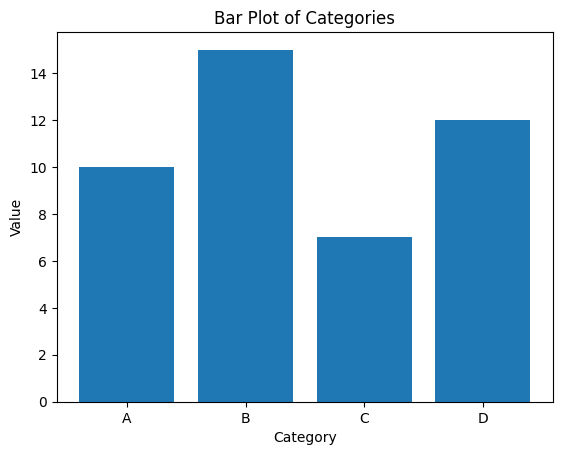

In [68]:
import matplotlib.pyplot as plt

categories = ["A", "B", "C", "D"]
values = [10, 15, 7, 12]

# Creating the bar plot
plt.bar(categories, values)
plt.xlabel("Category")  # Label for x-axis
plt.ylabel("Value")  # Label for y-axis
plt.title("Bar Plot of Categories")  # Plot title
plt.show()  # Show the plot

Seaborn Example (Single Line):<br>
Приклад Seaborn (один рядок):

In [ ]:
!pip install seaborn

In [114]:
categories = ["A", "B", "C", "D", "D", "D"]
values = [10, 15, 7, 12, 16, 8]

<Axes: >

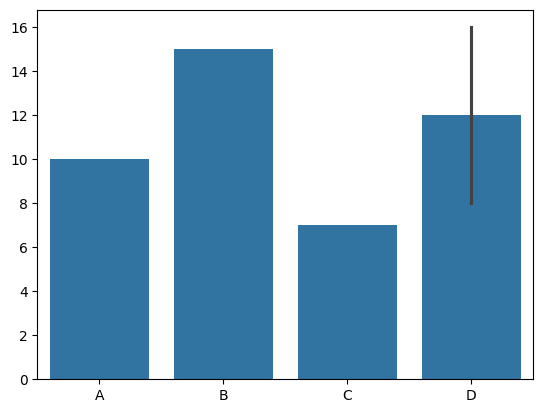

In [115]:
import seaborn as sns

# Assuming 'df' is a DataFrame with 'category' and 'value' columns
# sns.barplot(x="category", y="value", data=df) #that Much is Enough - original
sns.barplot(x=categories, y=values) #that Much is Enough

## 6. Requests

Using the simple syntax of Requests for HTTP, you can make requests (GET, POST, PUT, DELETE, etc.) without the hassle of managing low-level details like sockets and HTTP headers.<br>
Використовуючи простий синтаксис запитів для HTTP, ви можете надсилати запити (GET, POST, PUT, DELETE тощо) без клопоту щодо керування деталями низького рівня, такими як сокети та заголовки HTTP.

look program in traditional way<br>
дивіться програму традиційним способом

In [ ]:
import http.client
import json

conn = http.client.HTTPSConnection("api.example.com")
conn.request("GET", "/data")

response = conn.getresponse()
data = response.read()
parsed_data = json.loads(data)

conn.close()

With the Requests library, this can be done in a single line:<br>
За допомогою бібліотеки Requests це можна зробити одним рядком:

In [125]:
import requests

response = requests.get('https://home.masssage.kyiv.ua/data')
print(response)

<Response [403]>


## 7. BeautifulSoup

BeautifulSoup can be thought of as a line eliminator. When dealing with HTML to extract data, the process can get complex and time-consuming, often leading to large, bulky chunks of code. But with BeautifulSoup, you can simplify this, cutting down hundreds of lines into just a few.<br>
BeautifulSoup можна розглядати як засіб для усунення ліній. Коли ви маєте справу з HTML для отримання даних, процес може бути складним і трудомістким, що часто призводить до великих, об’ємних фрагментів коду. Але з BeautifulSoup ви можете спростити це, скоротивши сотні рядків лише на кілька.

In [127]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    def __init__(self):
        super().__init__()
        self.links = []

    def handle_starttag(self, tag, attrs):
        if tag == 'a':
            for attr in attrs:
                if attr[0] == 'href':
                    self.links.append(attr[1])

# Sample HTML content
html_content = """
<html>
<head><title>Sample Page</title></head>
<body>
<a href="https://example.com/page1">Link 1</a>
<a href="https://example.com/page2">Link 2</a>
</body>
</html>
"""

# Parse the HTML
parser = MyHTMLParser()
parser.feed(html_content)

# Output the extracted links
print(parser.links)

['https://example.com/page1', 'https://example.com/page2']


With BeautifulSoup, the same program can be done in a more straightforward eye catchy way:<br>
За допомогою BeautifulSoup цю ж програму можна виконати більш простим способом, що привертає увагу:

In [ ]:
!pip install bs4

In [130]:
from bs4 import BeautifulSoup

# Sample HTML content
html_content = """
<html>
<head><title>Sample Page</title></head>
<body>
<a href="https://example.com/page1">Link 1</a>
<a href="https://example.com/page2">Link 2</a>
</body>
</html>
"""

# Parse the HTML and extract all 'a' tags
soup = BeautifulSoup(html_content, 'html.parser')
links = soup.find_all('a')

# Output the extracted links
for link in links:
    print(link['href'])

https://example.com/page1
https://example.com/page2


## 8. Regex (re)

The re (Regular Expression) module in Python is used for string manipulation and pattern matching. Basically, it helps you find sequences of characters that match a specific pattern, like "abbbaaaccbac". You can use it to identify substrings that follow certain rules, and then extract or replace parts of a string.<br>
Модуль re (регулярний вираз) у Python використовується для маніпулювання рядками та зіставлення шаблонів. По суті, це допомагає вам знайти послідовності символів, які відповідають певному шаблону, наприклад "abbbaaaccbac". Ви можете використовувати його для ідентифікації підрядків, які відповідають певним правилам, а потім видобувати або замінювати частини рядка.

Without the re module, you'd have to manually loop through each string, checking if each character matches a specific condition — a tedious and error-prone process.<br>
Без модуля re вам довелося б вручну переглядати кожен рядок, перевіряючи, чи кожен символ відповідає певній умові — виснажливий і схильний до помилок процес.

In [133]:
# A more manual approach for email extraction
text = "Contact us at support@example.com.ua or sales@domain.com for more info."

emails = []
words = text.split()

# Checking for emails manually
for word in words:
    if "@" in word and "." in word:
        emails.append(word)

# Output the found emails
print(emails)

['support@example.com.ua', 'sales@domain.com']


With Regex, you can easily match complex patterns like email addresses in a single line:<br>
За допомогою Regex ви можете легко зіставляти складні шаблони, наприклад адреси електронної пошти, в одному рядку:

In [134]:
import re

# # Sample text
# text = "Contact us at support@example.com or sales@domain.com for more info."

# Find all email addresses in the text
emails = re.findall(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b', text)

# Output the found emails
print(emails)

['support@example.com.ua', 'sales@domain.com']


## 9. Dask

To understand how flexible Dask is, you need to walk through the following code example. In this script, you’ll see how, without Dask, you end up with large, bulky code that’s time-consuming and poorly represented. Not only that, but processing data manually becomes tedious, especially when using Pandas for handling large datasets.<br>
Щоб зрозуміти, наскільки гнучким є Dask, вам потрібно пройти через наступний приклад коду. У цьому сценарії ви побачите, як без Dask ви отримаєте великий, громіздкий код, який забирає багато часу та погано представлений. Мало того, обробка даних вручну стає виснажливою, особливо при використанні Pandas для обробки великих наборів даних.

In [148]:
import pandas as pd

# Read and process each CSV chunk manually
chunks = pd.read_csv('data1.csv', chunksize=10000)
df_list = []

for chunk in chunks:
    grouped_chunk = chunk.groupby('category').mean()
    df_list.append(grouped_chunk)

# Combine all chunks after processing
final_df = pd.concat(df_list)
# print(final_df)
final_df

,value,time
category,,
A,10.0,12.000000
B,15.0,22.000000
C,7.0,11.000000
D,12.0,9.333333


in Dask its look like<br>
у Dask це виглядає так

In [ ]:
!pip install dask.dataframe

In [147]:
import dask.dataframe as dd

# Read multiple CSV files, group by category, compute the mean, and parallelize the operation
df = dd.read_csv('data*.csv').groupby('category').mean().compute()

# Output the result
# print(df)
df

,value,time
category,,
A,10.0,12.000000
B,15.0,22.000000
C,7.0,11.000000
D,12.0,9.333333


## 10. PyAutoGUI

You may have encountered various online forms, like Google Forms or job application forms, where your previous data pops up and repeats the same steps automatically the next time.<br>
Можливо, ви стикалися з різноманітними онлайн-формами, як-от Google Forms або анкетами для прийому на роботу, де ваші попередні дані спливають і наступного разу автоматично повторюють ті самі кроки.

This works similarly to how PyAutoGUI can function. If the form’s layout stays the same, PyAutoGUI will repeat the exact same actions, saving you from typing out the details every time.<br>
Це працює так само, як може функціонувати PyAutoGUI. Якщо макет форми залишається незмінним, PyAutoGUI повторюватиме ті самі дії, позбавляючи вас необхідності щоразу вводити деталі.

This manual process would look something like this:<br>
Цей ручний процес виглядатиме приблизно так:

Click on the ‘Name’ field and type John Doe.<br>
Натисніть поле «Ім’я» і введіть John Doe.<br>
Click on the ‘Email’ field and type john@example.com.<br>
Натисніть поле «Електронна адреса» і введіть john@example.com.<br>
Click on the ‘Submit’ button to submit the form.<br>
Натисніть кнопку «Надіслати», щоб надіслати форму.<br>

Automates GUI tasks (clicking, typing, etc.) in minimal code.<br>
Автоматизує завдання графічного інтерфейсу користувача (клацання, введення тексту тощо) у мінімальному коді.<br>
But this can be minimized and work like your personal assistant with the help of this script.<br>
Але це можна мінімізувати і працювати як ваш персональний помічник за допомогою цього скрипта.

In [154]:
import pyautogui
import time

# Wait for the page to load before starting
time.sleep(3)

# Click on the 'Name' field and enter name
pyautogui.click(x=300, y=400)  # Coordinates of the Name field
pyautogui.write('John Doe')

# Click on the 'Email' field and enter email
pyautogui.click(x=300, y=500)  # Coordinates of the Email field
pyautogui.write('john@example.com')

# Click the 'Submit' button
pyautogui.click(x=300, y=600)  # Coordinates of the Submit button

## 11. OpenCV

In [155]:
import numpy as np
from PIL import Image

# Load the image and convert it to grayscale
img = Image.open('image.jpg').convert('L')
img_array = np.array(img)

# Define Sobel operator kernels
sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

# Get image dimensions
rows, cols = img_array.shape

# Apply the Sobel operator manually
edges = np.zeros_like(img_array)

for i in range(1, rows-1):
    for j in range(1, cols-1):
        gx = np.sum(sobel_x * img_array[i-1:i+2, j-1:j+2])
        gy = np.sum(sobel_y * img_array[i-1:i+2, j-1:j+2])
        # Gradient magnitude
        edges[i, j] = min(255, np.sqrt(gx**2 + gy**2

SyntaxError: incomplete input (2381287534.py, line 23)

Edge Detection: With OpenCV (Minimal Code)

In [1]:
import cv2

# Load the image
img = cv2.imread('image.jpg', 0)
# print(img)

# Perform edge detection using Canny
edges = cv2.Canny(img, 100, 200)

# Display and save the resulting edges
cv2.imshow('Edges', edges)
cv2.imwrite('edges_cv.jpg', edges)
cv2.waitKey(0)
cv2.destroyAllWindows()

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
